In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_column', 100)

In [3]:
df = pd.read_csv('train.csv', index_col=None)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
round(df.isnull().sum()/len(df.index), 2)>0.4

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual 

# 1. Data Cleaning & EDA

## Handling Missing Values
There are 4 primary columns having more than 50% missing values in them. Also, looking at the column decription they can be removed because there are other variables present in the data serving same business descriptiom. For e.g.

1. PoolArea defines the size of pool present, thus PoolQC can be remvoed as of now because of alot missing values. Although it can be an important factor in determining hourse price. Similary for FireplaceQu, it can be an important factor but not in all cases since there is already a varibale Fireplace defining presence/number of Fireplace at a hourse.
2. Features like Fence, MisFeatures, LotFrontage and Alley seems important but have lot of missing values.

In [6]:
drop50 = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
# Dropping columns with high missing values
df = df.drop(drop50, axis=1)

In [7]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [8]:
# Number of rows having missing values greater 5, 7, 10
print(len(df[df.isnull().sum(axis=1) > 5].index)/len(df))
print(len(df[df.isnull().sum(axis=1) > 7].index)/len(df))
print(len(df[df.isnull().sum(axis=1) > 10].index)/len(df))

0.0136986301369863
0.004794520547945206
0.0


In [9]:
df = df.drop(['LotFrontage'], axis=1)

In [10]:
# Dropping all rows in the data-set having more than 5 missing values. Since the 

df = df[df.isnull().sum(axis=1) <= 5]
print(df.shape)
df.info()

(1453, 75)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 75 columns):
Id               1453 non-null int64
MSSubClass       1453 non-null int64
MSZoning         1453 non-null object
LotArea          1453 non-null int64
Street           1453 non-null object
LotShape         1453 non-null object
LandContour      1453 non-null object
Utilities        1453 non-null object
LotConfig        1453 non-null object
LandSlope        1453 non-null object
Neighborhood     1453 non-null object
Condition1       1453 non-null object
Condition2       1453 non-null object
BldgType         1453 non-null object
HouseStyle       1453 non-null object
OverallQual      1453 non-null int64
OverallCond      1453 non-null int64
YearBuilt        1453 non-null int64
YearRemodAdd     1453 non-null int64
RoofStyle        1453 non-null object
RoofMatl         1453 non-null object
Exterior1st      1453 non-null object
Exterior2nd      1453 non-null object
MasVnrType     

In [11]:
# Number of rows having missing values greater 2, 3, 4
print(len(df[df.isnull().sum(axis=1) > 2].index)/len(df))
print(len(df[df.isnull().sum(axis=1) > 3].index)/len(df))
print(len(df[df.isnull().sum(axis=1) > 4].index)/len(df))

0.07157604955264969
0.07157604955264969
0.07157604955264969


In [12]:
len(df[df.isnull().sum(axis=1) > 2].index)

104

## Categorical and Numerical Variable Analysis of Missing Values

In [13]:
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

In [14]:
df[numerical].isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      74
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [15]:
df[categorical].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       74
GarageFinish     74
GarageQual       74
GarageCond       74
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [16]:
pd.set_option('display.max_rows', 150)

In [17]:
df[df.isnull().sum(axis=1)>2][['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']]

GarageType GarageFinish GarageQual GarageCond
17      CarPort          Unf         TA         TA
48          NaN          NaN        NaN        NaN
78          NaN          NaN        NaN        NaN
88          NaN          NaN        NaN        NaN
89          NaN          NaN        NaN        NaN
90       Detchd          Unf         TA         TA
99          NaN          NaN        NaN        NaN
102      Attchd          Unf         TA         TA
108         NaN          NaN        NaN        NaN
125         NaN          NaN        NaN        NaN
127         NaN          NaN        NaN        NaN
140         NaN          NaN        NaN        NaN
148         NaN          NaN        NaN        NaN
155         NaN          NaN        NaN        NaN
156      Detchd          Unf         TA         TA
163         NaN          NaN        NaN        NaN
165         NaN          NaN        NaN        NaN
182      Attchd          RFn         TA         TA
198         NaN          NaN        NaN        NaN
210         NaN          NaN        NaN        NaN
241         NaN          NaN        NaN        NaN
250         NaN          NaN        NaN        NaN
259      Detchd          Unf         TA         TA
287         NaN          NaN        NaN        NaN
291         NaN          NaN        NaN        NaN
307         NaN          NaN        NaN        NaN
342      Detchd          Unf         TA         TA
362     BuiltIn          RFn         TA         TA
371      Detchd          Fin         TA         TA
375         NaN          NaN        NaN        NaN
386         NaN          NaN        NaN        NaN
392      Attchd          RFn         TA         TA
393         NaN          NaN        NaN        NaN
431         NaN          NaN        NaN        NaN
434         NaN          NaN        NaN        NaN
441         NaN          NaN        NaN        NaN
464         NaN          NaN        NaN        NaN
495         NaN          NaN        NaN        NaN
528         NaN          NaN        NaN        NaN
532      Detchd          Unf         TA         TA
535         NaN          NaN        NaN        NaN
553      Detchd          Fin         TA         TA
562         NaN          NaN        NaN        NaN
582         NaN          NaN        NaN        NaN
613         NaN          NaN        NaN        NaN
614         NaN          NaN        NaN        NaN
620         NaN          NaN        NaN        NaN
635         NaN          NaN        NaN        NaN
636         NaN          NaN        NaN        NaN
638         NaN          NaN        NaN        NaN
646      Detchd          Unf         TA         TA
649         NaN          NaN        NaN        NaN
710         NaN          NaN        NaN        NaN
736      Detchd          Unf         TA         TA
738         NaN          NaN        NaN        NaN
749      Detchd          Unf         TA         TA
750         NaN          NaN        NaN        NaN
778      Detchd          Unf         TA         TA
784         NaN          NaN        NaN        NaN
826         NaN          NaN        NaN        NaN
843         NaN          NaN        NaN        NaN
868      Attchd          Unf         TA         TA
894      Attchd          Unf         TA         TA
897      Detchd          Unf         TA         TA
921         NaN          NaN        NaN        NaN
942         NaN          NaN        NaN        NaN
954         NaN          NaN        NaN        NaN
960         NaN          NaN        NaN        NaN
968         NaN          NaN        NaN        NaN
970         NaN          NaN        NaN        NaN
976         NaN          NaN        NaN        NaN
984      Attchd          Unf         TA         TA
1000     Detchd          Unf         TA         Fa
1009        NaN          NaN        NaN        NaN
1030        NaN          NaN        NaN        NaN
1035     Detchd          Unf         TA         TA
1038        NaN          NaN        NaN        NaN
1045     Attchd          Un

In [18]:
df[df.isnull().sum(axis=1)>2][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
48         TA       TA           No          Unf          Unf
78         TA       TA           No          Unf          Unf
88         TA       Fa           No          Unf          Unf
89         Gd       TA           No          GLQ          Unf
90        NaN      NaN          NaN          NaN          NaN
99         TA       TA           No          ALQ          Unf
102       NaN      NaN          NaN          NaN          NaN
108        TA       TA           No          Unf          Unf
125        TA       TA           Av          GLQ          Unf
127        TA       TA           No          LwQ          Unf
140        TA       TA           No          ALQ          Unf
148        Gd       TA           No          GLQ          Unf
155        TA       TA           No          Unf          Unf
156       NaN      NaN          NaN          NaN          NaN
163        TA       TA           No          Unf          Unf
165        TA       TA           No          ALQ          Rec
182       NaN      NaN          NaN          NaN          NaN
198        TA       TA           No          Unf          Unf
210        TA       TA           No          Rec          Unf
241        TA       TA           No          ALQ          Unf
250        TA       TA           No          Unf          Unf
259       NaN      NaN          NaN          NaN          NaN
287        TA       TA           No          BLQ          Unf
291        TA       Fa           No          Rec          Unf
307        TA       TA           No          Unf          Unf
342       NaN      NaN          NaN          NaN          NaN
362       NaN      NaN          NaN          NaN          NaN
371       NaN      NaN          NaN          NaN          NaN
375        Fa       Po           Gd          BLQ          Unf
386        TA       TA           No          Unf          Unf
392       NaN      NaN          NaN          NaN          NaN
393        TA       TA           No          Rec          Unf
431        TA       TA           No          Unf          Unf
434        Gd       TA           Av          ALQ          Unf
441        TA       TA           No          ALQ          Unf
464        Gd       TA           No          Rec          Unf
495        TA       TA           No          Rec          Unf
528        TA       TA           Mn          ALQ          Unf
532       NaN      NaN          NaN          NaN          NaN
535        Gd       TA           Gd          GLQ          Unf
553       NaN      NaN          NaN          NaN          NaN
562        TA       TA           No          BLQ          Unf
582        Gd       TA           Av          GLQ          Unf
613        Gd       TA           No          ALQ          Unf
614        Gd       TA           Av          LwQ          GLQ
620        TA       TA           No          BLQ          Unf
635        TA       Fa           No          LwQ          Unf
636        TA       Fa           No          Unf          Unf
638        Fa       TA           No          Unf          Unf
646       NaN      NaN          NaN          NaN          NaN
649        Gd       TA           Av          BLQ          GLQ
710        TA       TA           No          Unf          Unf
736       NaN      NaN          NaN          NaN          NaN
738        Gd       Gd           Gd          GLQ          Unf
749       NaN      NaN          NaN          NaN          NaN
750        TA       Fa           No          Unf          Unf
778       NaN      NaN          NaN          NaN          NaN
784        TA       TA           No          Unf          Unf
826        TA       TA           No          ALQ          Unf
843        TA       TA           No          Unf          Unf
868       NaN      NaN          NaN          NaN          NaN
894       NaN      NaN          NaN          NaN          NaN
897       NaN      NaN          NaN  

## Missing Values for Garage and Basement Details 
1. There are 74 houses for which Garage details are missing
2. There are 30 hourses for Basement details are missing

This means that either the houses don't have garage and basement or this error is due to data recording. It's better to remove these values since no garage has already been taken care of in categories which means it's an error in data recording.

In [19]:
df = df[df.isnull().sum(axis=1) <= 2]
print(df.shape)
df.info()

(1349, 75)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 75 columns):
Id               1349 non-null int64
MSSubClass       1349 non-null int64
MSZoning         1349 non-null object
LotArea          1349 non-null int64
Street           1349 non-null object
LotShape         1349 non-null object
LandContour      1349 non-null object
Utilities        1349 non-null object
LotConfig        1349 non-null object
LandSlope        1349 non-null object
Neighborhood     1349 non-null object
Condition1       1349 non-null object
Condition2       1349 non-null object
BldgType         1349 non-null object
HouseStyle       1349 non-null object
OverallQual      1349 non-null int64
OverallCond      1349 non-null int64
YearBuilt        1349 non-null int64
YearRemodAdd     1349 non-null int64
RoofStyle        1349 non-null object
RoofMatl         1349 non-null object
Exterior1st      1349 non-null object
Exterior2nd      1349 non-null object
MasVnrType     

# Missing Value Imputation

In [20]:
# Imputing mean valus in numerical variable - MasVnrArea

df.loc[np.isnan(df['MasVnrArea']), 'MasVnrArea'] = df['MasVnrArea'].mean()

In [21]:
# Imputing Categorical Variables with most frequent values

df['MasVnrType'] = df['MasVnrType'].astype('category')
print(df['MasVnrType'].value_counts())

df['BsmtExposure'] = df['BsmtExposure'].astype('category')
print(df['BsmtExposure'].value_counts())

df['Electrical'] = df['Electrical'].astype('category')
print(df['Electrical'].value_counts())

df['BsmtFinType2'] = df['BsmtFinType2'].astype('category')
print(df['BsmtFinType2'].value_counts())

None       764
BrkFace    434
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
No    896
Av    213
Gd    128
Mn    111
Name: BsmtExposure, dtype: int64
SBrkr    1252
FuseA      76
FuseF      17
FuseP       2
Mix         1
Name: Electrical, dtype: int64
Unf    1186
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64


In [22]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')

In [23]:
df.isnull().sum()>0

Id               False
MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1459
Data columns (total 75 columns):
Id               1349 non-null int64
MSSubClass       1349 non-null int64
MSZoning         1349 non-null object
LotArea          1349 non-null int64
Street           1349 non-null object
LotShape         1349 non-null object
LandContour      1349 non-null object
Utilities        1349 non-null object
LotConfig        1349 non-null object
LandSlope        1349 non-null object
Neighborhood     1349 non-null object
Condition1       1349 non-null object
Condition2       1349 non-null object
BldgType         1349 non-null object
HouseStyle       1349 non-null object
OverallQual      1349 non-null int64
OverallCond      1349 non-null int64
YearBuilt        1349 non-null int64
YearRemodAdd     1349 non-null int64
RoofStyle        1349 non-null object
RoofMatl         1349 non-null object
Exterior1st      1349 non-null object
Exterior2nd      1349 non-null object
MasVnrType       1349 non-

In [25]:
numerical = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

print(len(numerical))
print(len(categorical))

41
34


<Figure size 1440x720 with 0 Axes>

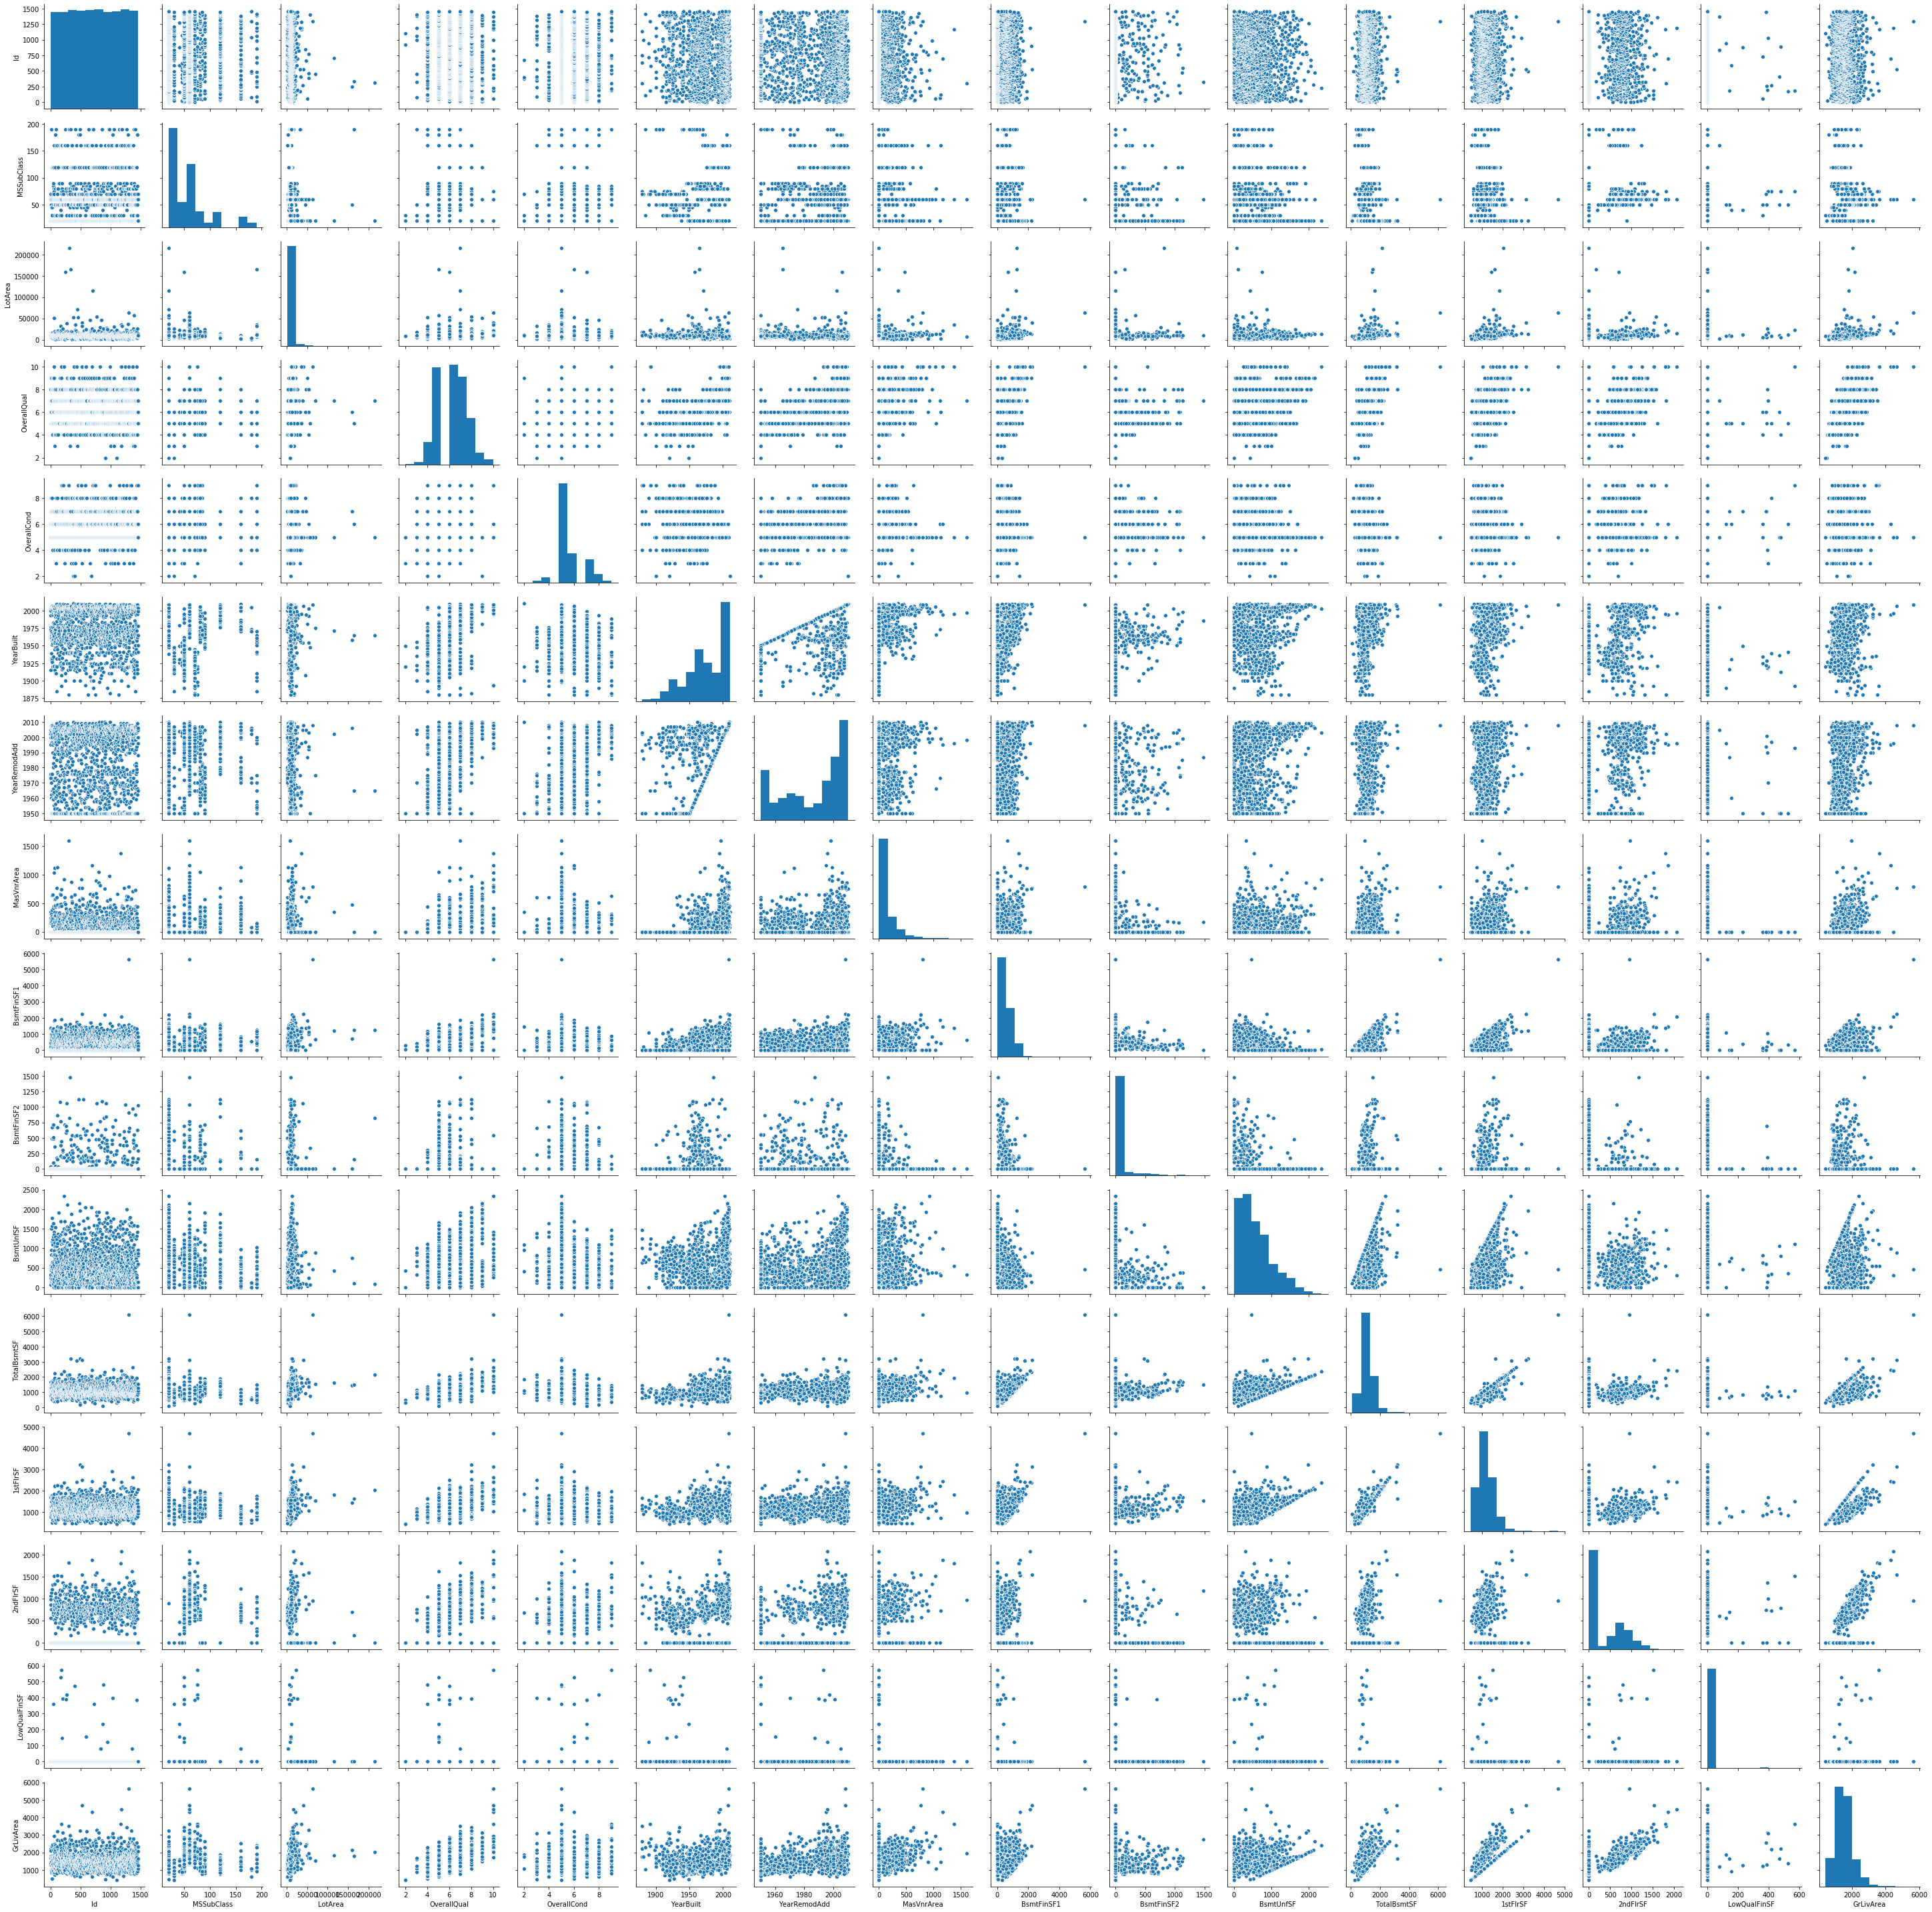

In [26]:
# Pairwise scatter plot for numerical variables
numeric1 = numerical[:20]
numeric2 = numerical[20:]

plt.figure(figsize=(20, 10))
sns.pairplot(df[numeric1])
plt.show()

<Figure size 1440x720 with 0 Axes>

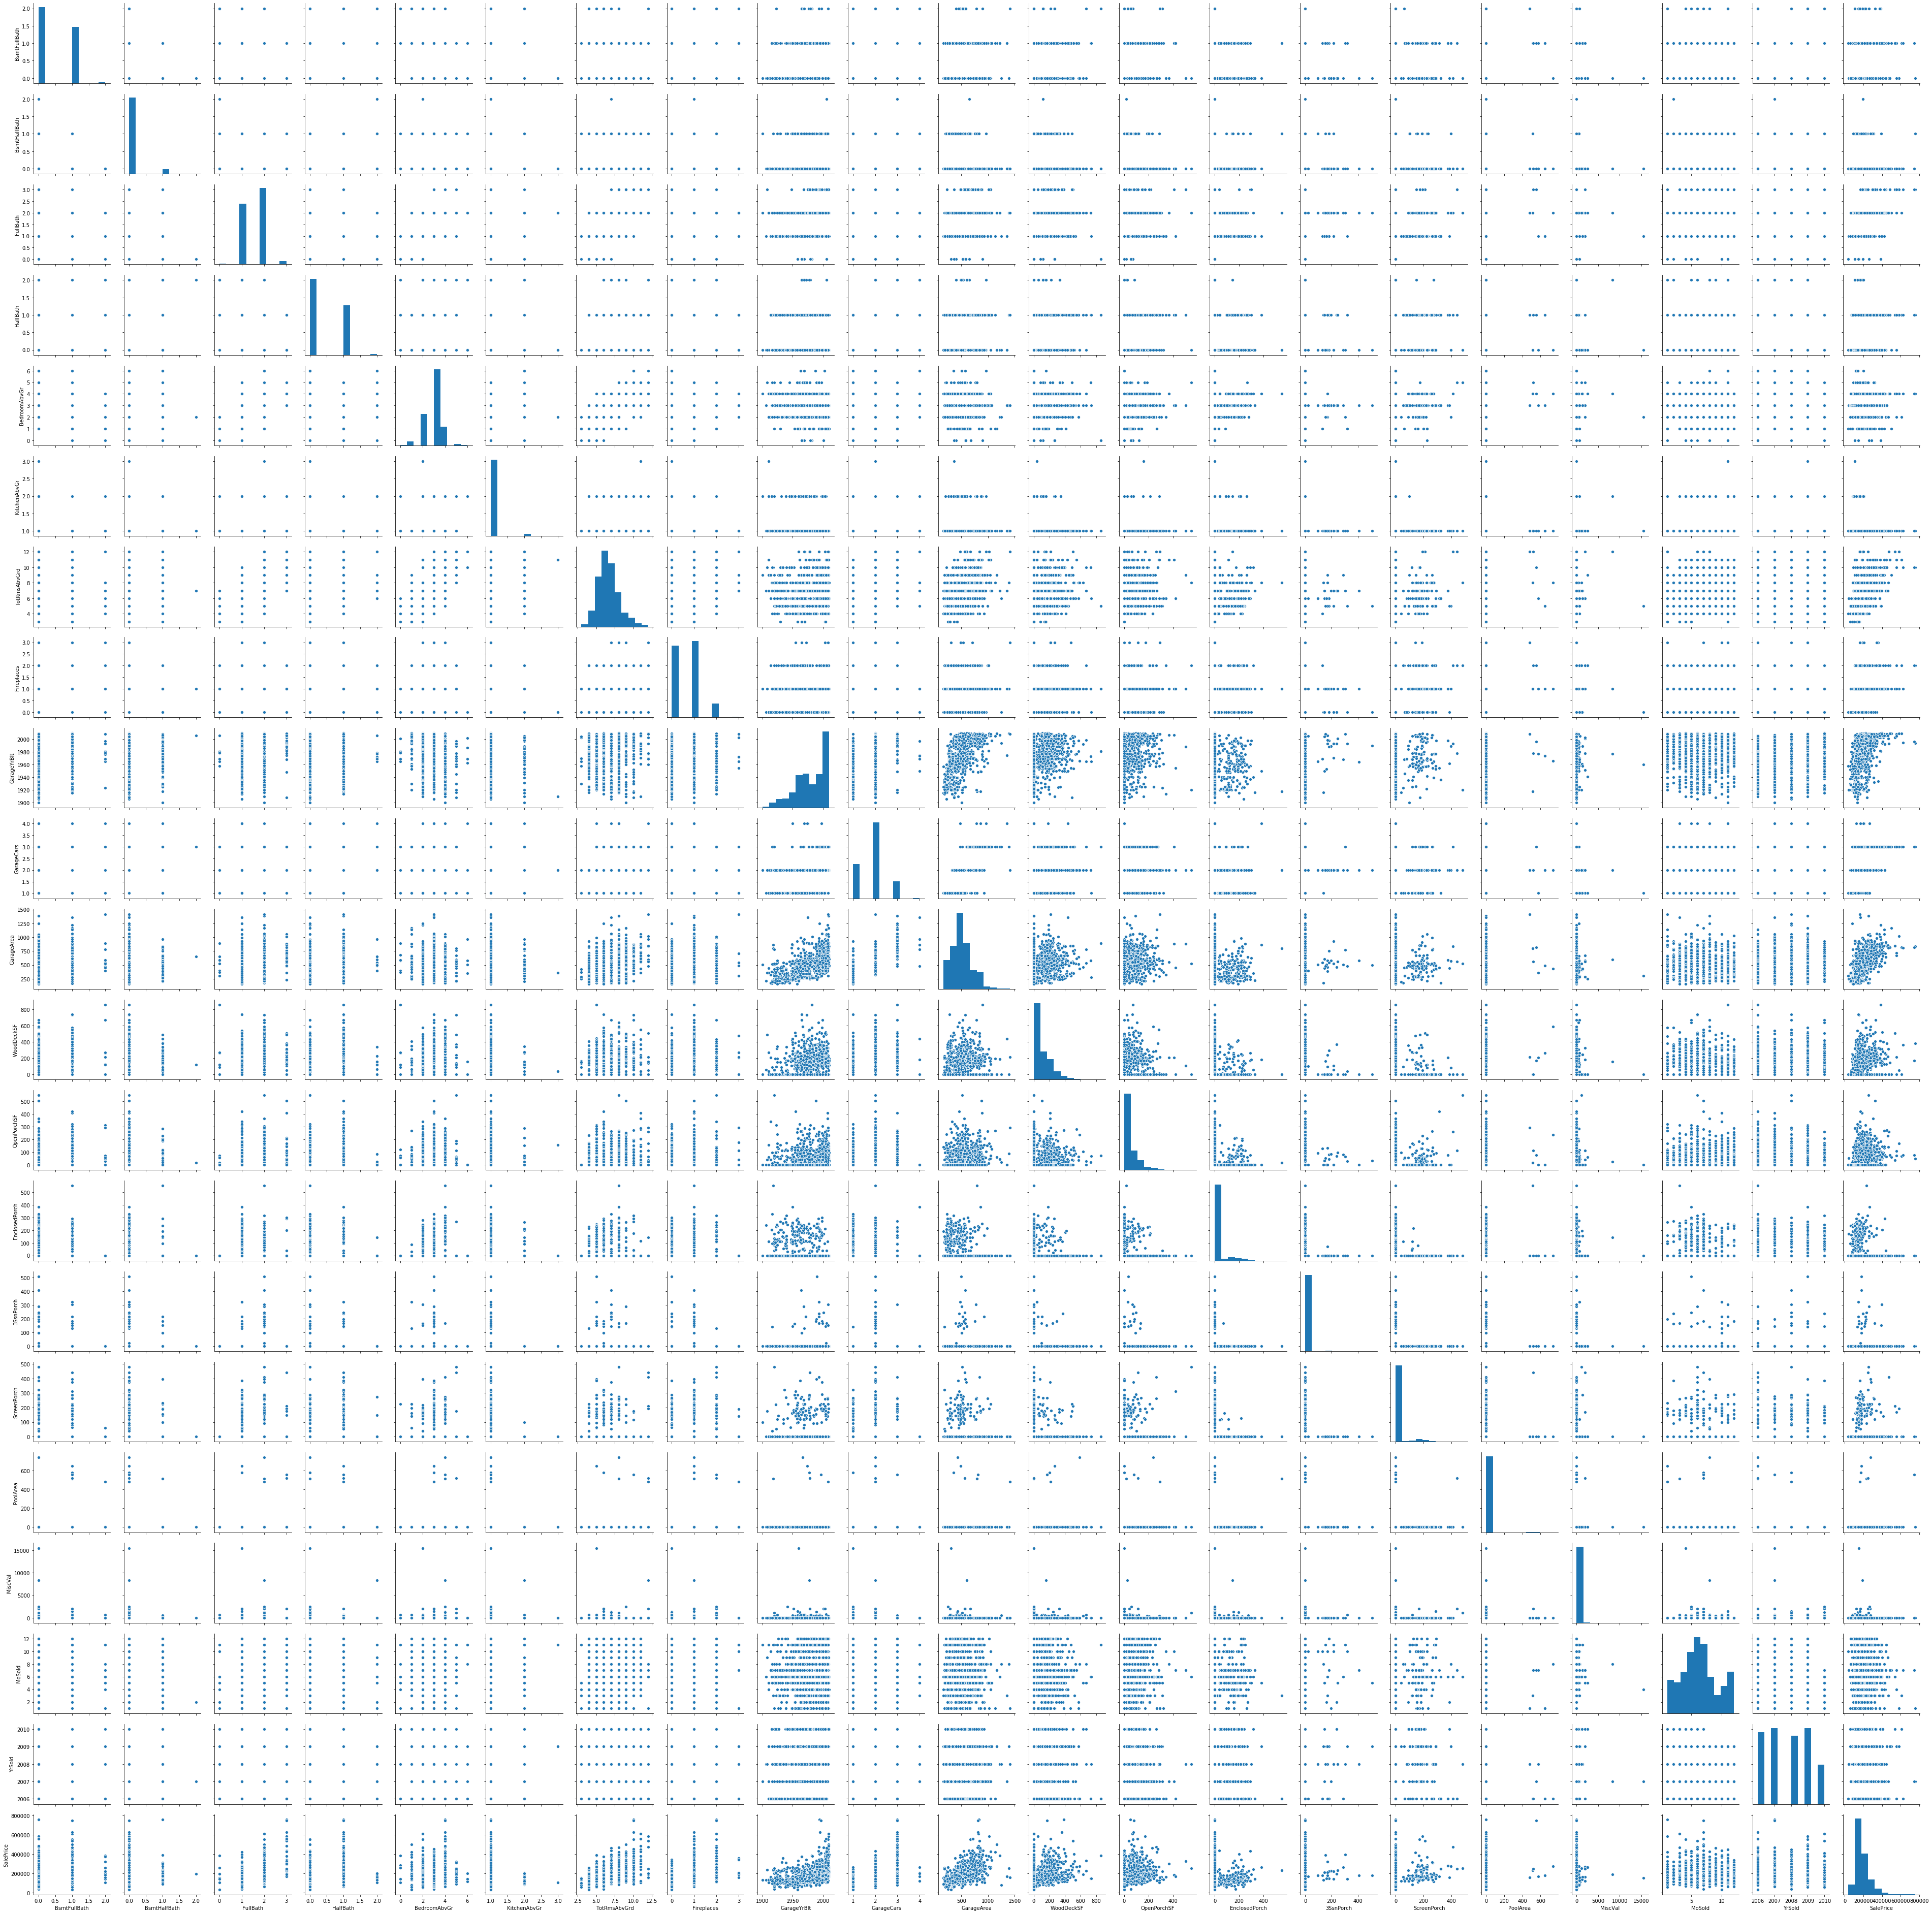

In [27]:
plt.figure(figsize=(20, 10))
sns.pairplot(df[numeric2])
plt.show()

In [26]:
num_cat = [i for i in numerical if len(df[i].unique())<=5]
num_cat

['MasVnrType',
 'BsmtExposure',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

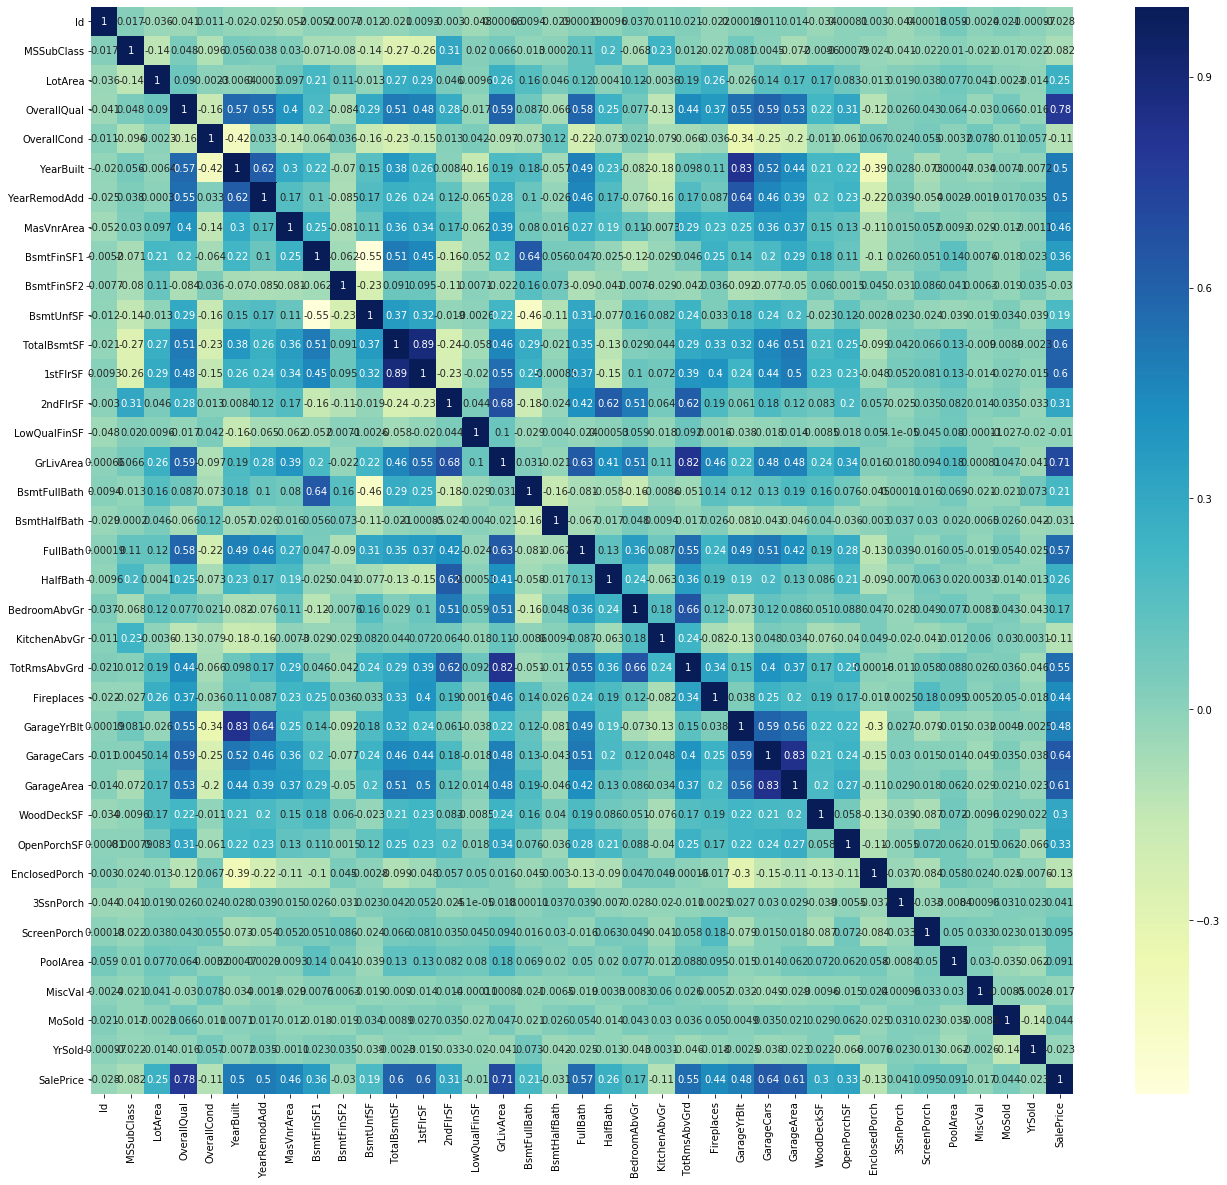

In [29]:
plt.figure(figsize = (22, 20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [30]:
df.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1349.000000  1349.000000    1349.000000  1349.000000  1349.000000   
mean    732.300964    56.078577   10717.140104     6.226835     5.590808   
std     421.504186    41.185202   10314.629544     1.326121     1.077187   
min       1.000000    20.000000    1300.000000     2.000000     2.000000   
25%     367.000000    20.000000    7750.000000     5.000000     5.000000   
50%     732.000000    50.000000    9600.000000     6.000000     5.000000   
75%    1099.000000    70.000000   11764.000000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1349.000000   1349.000000  1349.000000  1349.000000  1349.000000   
mean   1973.249815   1985.802817   110.441462   465.710156    49.171979   
std      29.569322     20.283150   184.941796   459.670768   165.984649   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1956.000000   1968.000000     0.000000     0.000000     0.000000   
50%    1976.000000   1995.000000     0.000000   415.000000     0.000000   
75%    2002.000000   2004.000000   174.000000   735.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1349.000000  1349.000000  1349.000000  1349.000000   1349.000000   
mean    583.458117  1098.340252  1177.445515   357.435878      4.187546   
std     440.249471   410.359283   388.265164   440.351480     40.548242   
min       0.000000   105.000000   438.000000     0.000000      0.000000   
25%     248.000000   822.000000   894.000000     0.000000      0.000000   
50%     490.000000  1024.000000  1099.000000     0.000000      0.000000   
75%     816.000000  1328.000000  1416.000000   741.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1349.000000   1349.000000   1349.000000  1349.000000  1349.000000   
mean   1539.068940      0.440326      0.060044     1.578947     0.404744   
std     519.866317      0.515664      0.240759     0.548022     0.504438   
min     438.000000      0.000000      0.000000     0.000000     0.000000   
25%    1164.000000      0.000000      0.000000     1.000000     0.000000   
50%    1482.000000      0.000000      0.000000     2.000000     0.000000   
75%    1792.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      2.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1349.000000   1349.000000   1349.000000  1349.00000  1349.000000   
mean       2.864344      1.030393      6.551520     0.64937  1978.786509   
std        0.777166      0.175996      1.582937     0.64635    24.774121   
min        0.000000      1.000000      3.000000     0.00000  1900.000000   
25%        2.000000      1.000000      5.000000     0.00000  1962.000000   
50%        3.000000      1.000000      6.000000     1.00000  1980.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      3.000000     12.000000     3.00000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1349.000000  1349.000000  1349.000000  1349.000000    1349.000000   
mean      1.873981   502.009637    99.128984    48.031134      21.238695   
std       0.633262   186.589146   127.366220    65.553943      60.818021   
min       1.000000   160.000000     0.000000     0.000000       0.000000   
25%       1.000000   380.000000     0.000000     0.000000       0.000000   
50%       2.000000   484.000000     0.000000    28.000000       0.000000   
75%       2.000000   583.000000   173.000000    70.000000       0.000000   
m

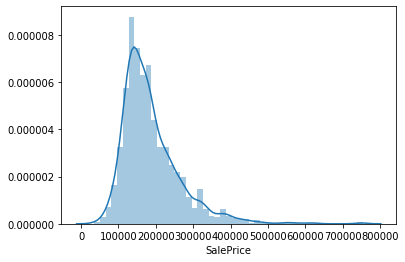

In [27]:
sns.distplot(df['SalePrice'])
plt.show()

In [28]:
from datetime import datetime
year = datetime.now().year

## Feature Engineering

In [29]:
df['house_age'] = year - df['YearBuilt']
df['house_age']

0        17
1        44
2        19
3       105
4        20
5        27
6        16
7        47
8        89
9        81
10       55
11       15
12       58
13       14
14       60
15       91
16       50
18       16
19       62
20       15
21       90
22       18
23       44
24       52
25       13
26       69
27       13
28       63
29       93
30      100
31       54
32       13
33       61
34       15
35       16
36       26
37       66
38       67
40       55
41       61
42       37
43       45
44       61
45       15
46       17
47       14
49       54
50       23
51       86
52       57
53       39
54       65
55       56
56       21
57       16
58       14
59       48
60       16
61      100
62       14
63       99
64       23
65       16
66       50
67       17
68       75
69       67
70       47
71       38
72       22
73       66
74      105
75       47
76       64
77       72
       ... 
1380    106
1381     50
1382    100
1383    102
1384     81
1385     98
1386     42
1387

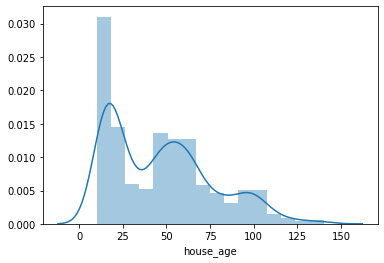

In [30]:
sns.distplot(df['house_age'])
plt.show()

In [31]:
df = df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [32]:
numerical.remove('YearBuilt')
numerical.remove('YearRemodAdd')

In [33]:
df.shape

(1349, 74)

# 2. Data Preparation 

## Data Preparation

Let's now prepare the data and build the model.

In [34]:
num_cat.append('BsmtFinType2')
categorical.extend(num_cat)
numerical = [i for i in numerical if i not in num_cat]

print(len(categorical))
print(len(numerical))

46
27


In [35]:
numerical.remove('Id')

In [36]:
# Scaling numerical variables using MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df[numerical] = mms.fit_transform(df[numerical])

df.head()

Id  MSSubClass MSZoning   LotArea Street LotShape LandContour Utilities  \
0   1    0.235294       RL  0.033420   Pave      Reg         Lvl    AllPub   
1   2    0.000000       RL  0.038795   Pave      Reg         Lvl    AllPub   
2   3    0.235294       RL  0.046507   Pave      IR1         Lvl    AllPub   
3   4    0.294118       RL  0.038561   Pave      IR1         Lvl    AllPub   
4   5    0.235294       RL  0.060576   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0        0.625     0.428571     Gable  CompShg     VinylSd     VinylSd   
1        0.500     0.857143     Gable  CompShg     MetalSd     MetalSd   
2        0.625     0.428571     Gable  CompShg     VinylSd     VinylSd   
3        0.625     0.428571     Gable  CompShg     Wd Sdng     Wd Shng   
4        0.750     0.428571     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace     0.12250        Gd        TA      PConc       Gd       TA   
1       None     0.00000        TA        TA     CBlock       Gd       TA   
2    BrkFace     0.10125        Gd        TA      PConc       Gd       TA   
3       None     0.00000        TA        TA     BrkTil       TA       Gd   
4    BrkFace     0.21875        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ    0.125089          Unf         0.0   0.064212   
1           Gd          ALQ    0.173281          Unf         0.0   0.121575   
2           Mn          GLQ    0.086109          Unf         0.0   0.185788   
3           No          ALQ    0.038271          Unf         0.0   0.231164   
4           Av          GLQ    0.116052          Unf         0.0   0.209760   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0     0.125062    GasA        Ex          Y      SBrkr  0.098260  0.413559   
1     0.192673    GasA        Ex          Y      SBrkr  0.193700  0.000000   
2     0.135720    GasA        Ex          Y      SBrkr  0.113305  0.419370   
3     0.108410    GasA        Gd          Y      SBrkr  0.122943  0.366102   
4     0.173189    GasA        Ex          Y      SBrkr  0.166197  0.509927   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   0.244427             1             0         2         1   
1           0.0   0.158340             0             1         2         0   
2           0.0   0.259032             1             0         2         1   
3           0.0   0.245772             1             0         1         0   
4           0.0   0.338201             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0      0.500000             1          Gd      0.555556        Typ   
1      0.500000             1          TA      0.333333        Typ   
2      0.500000             1          Gd      0.333333        Typ   
3      0.500000             1          Gd      0.444444        Typ   
4      0.666667             1          Gd      0.666667        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd     0.936364          RFn           2    0.308426   
1           1     Attchd     0.690909          RFn           2    0.238474   
2           1     Attchd     0.918182          RFn           2    0.356121   

In [37]:
_list = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'YrSold']
categorical = [i for i in categorical if i not in _list]

In [38]:
dfcategorical = df[categorical]
dfcategorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
1     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
2     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
4     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

  BsmtFinType1 Heating HeatingQC CentralAir KitchenQual Functional GarageType  \
0          GLQ    GasA        Ex          Y          Gd        Typ     Attchd   
1          ALQ    GasA        Ex          Y          TA        Typ     Attchd   
2          GLQ    GasA        Ex          Y          Gd        Typ     Attchd   
3          ALQ    GasA        Gd          Y          Gd        Typ     Detchd   
4          GLQ    GasA        Ex          Y          Gd        Typ     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  MasVnrType BsmtExposure Electrical BsmtFinType2  
0    BrkFace           No      SBrkr          Unf  
1       None           Gd      SBrkr          Unf  
2    BrkFace           Mn      SBrkr          Unf  
3       None           No      SBrkr          Unf  
4    BrkFace           Av      SBrkr          Unf

In [39]:
dummies = pd.get_dummies(dfcategorical, drop_first=True)
dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

In [40]:
# drop categorical variables 
df = df.drop(categorical, axis=1)

# concat dummy variables with X
df = pd.concat([df, dummies], axis=1)

In [41]:
df.head()

Id  MSSubClass   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0   1    0.235294  0.033420        0.625     0.428571     0.12250    0.125089   
1   2    0.000000  0.038795        0.500     0.857143     0.00000    0.173281   
2   3    0.235294  0.046507        0.625     0.428571     0.10125    0.086109   
3   4    0.294118  0.038561        0.625     0.428571     0.00000    0.038271   
4   5    0.235294  0.060576        0.750     0.428571     0.21875    0.116052   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0   0.064212     0.125062  0.098260  0.413559           0.0   
1         0.0   0.121575     0.192673  0.193700  0.000000           0.0   
2         0.0   0.185788     0.135720  0.113305  0.419370           0.0   
3         0.0   0.231164     0.108410  0.122943  0.366102           0.0   
4         0.0   0.209760     0.173189  0.166197  0.509927           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.244427             1             0         2         1      0.500000   
1   0.158340             0             1         2         0      0.500000   
2   0.259032             1             0         2         1      0.500000   
3   0.245772             1             0         1         0      0.500000   
4   0.338201             1             0         2         1      0.666667   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1      0.555556           0     0.936364           2   
1             1      0.333333           1     0.690909           2   
2             1      0.333333           1     0.918182           2   
3             1      0.444444           1     0.890909           3   
4             1      0.666667           1     0.909091           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.308426    0.000000     0.111517       0.000000        0.0          0.0   
1    0.238474    0.347725     0.000000       0.000000        0.0          0.0   
2    0.356121    0.000000     0.076782       0.000000        0.0          0.0   
3    0.383148    0.000000     0.063985       0.492754        0.0          0.0   
4    0.537361    0.224037     0.153565       0.000000        0.0          0.0   

   PoolArea  MiscVal    MoSold  YrSold  SalePrice  house_age  MSZoning_FV  \
0       0.0      0.0  0.090909    2008   0.240644         17            0   
1       0.0      0.0  0.363636    2007   0.203128         44            0   
2       0.0      0.0  0.727273    2008   0.261487         19            0   
3       0.0      0.0  0.090909    2006   0.145464        105            0   
4       0.0      0.0  1.000000    2008   0.298308         20            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  \
0            0            1            0            1             0   
1            0            1            0            1             0   
2            0            1            0            1             0   
3            0            1            0            1             0   
4            0            1            0            1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  ...  \
0                1                 0                  0              0  ...   
1                1                 0                  0              1  ...   
2                1                 0                  0              0  ...   
3                1                 0                  0              0  ...   


In [42]:
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

# 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [48]:
# list of alphas to tune
params = {'alpha': [0.00005, 0.0001, 0.0002, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.005, 0.007, 0.01, 0.05, 0.07, 
                    0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2',  cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.005, 0.007, 0.01,
                                   0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['mean_train_score']>=0.85]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004428      0.006142         0.003125        0.006250       5e-05   
1       0.009375      0.007655         0.000000        0.000000      0.0001   
2       0.006250      0.007655         0.000000        0.000000      0.0002   
3       0.007256      0.007081         0.006259        0.007666      0.0003   
4       0.006250      0.007654         0.000000        0.000000      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}           0.869424           0.678832           0.884124   
1  {'alpha': 0.0001}           0.869432           0.678836           0.884146   
2  {'alpha': 0.0002}           0.869447           0.678843           0.884191   
3  {'alpha': 0.0003}           0.869462           0.678851           0.884236   
4  {'alpha': 0.0005}           0.869491           0.678867           0.884324   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.889698           0.698160         0.804048        0.094777   
1           0.889716           0.698214         0.804069        0.094772   
2           0.889752           0.698320         0.804111        0.094763   
3           0.889788           0.698426         0.804152        0.094753   
4           0.889860           0.698636         0.804235        0.094734   

   rank_test_score  split0_train_score  split1_train_score  \
0               23            0.928729            0.948057   
1               22            0.928729            0.948057   
2               21            0.928729            0.948057   
3               20            0.928729            0.948057   
4               19            0.928729            0.948057   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.928583            0.926666            0.942232   
1            0.928583            0.926666            0.942232   
2            0.928582            0.926666            0.942232   
3            0.928582            0.926666            0.942232   
4            0.928582            0.926665            0.942232   

   mean_train_score  std_train_score  
0          0.934853         0.008633  
1          0.934853         0.008633  
2          0.934853         0.008633  
3          0.934853         0.008633  
4          0.934853         0.008633

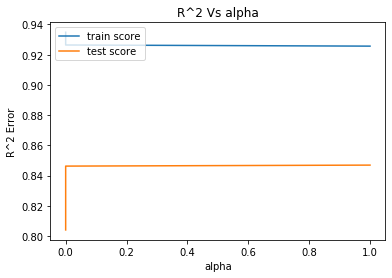

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 Error')
plt.title("R^2 Vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [51]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.30704439e-02,  2.54690588e-01,  6.80728707e-02,  6.91485399e-02,
        6.18735820e-02,  1.54566007e-01,  2.89047013e-02,  1.21984918e-03,
        1.52843570e-01,  1.37650989e-01,  1.35980931e-01, -2.04762056e-02,
        1.64230503e-01,  3.03671134e-04,  7.29268022e-04,  4.55201185e-03,
        1.39815661e-03, -2.72975583e-02, -1.81722436e-02,  1.45303424e-02,
        3.11282520e-03, -3.03054043e-03,  7.45595469e-03,  2.58131986e-02,
        1.40831079e-02, -8.36295354e-04,  4.23535297e-03,  1.14159439e-02,
        1.45078047e-02,  8.80300100e-02, -2.47349776e-02, -5.03089451e-03,
       -5.51453860e-04, -5.65598217e-04,  4.66914266e-02,  3.09012987e-02,
        3.12564028e-02,  2.79539754e-02,  4.86020589e-02,  3.16834893e-03,
        5.15598860e-03,  1.10908682e-03,  1.05218799e-02, -1.55676345e-02,
        3.70867152e-03,  0.00000000e+00,  9.90918241e-03, -1.36634243e-02,
       -2.56853931e-02,  2.25176354e-04, -3.65769027e-03, -9.05472371e-02,
       -9.92741880e-03, -

## Lasso

In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,  param_grid = params, scoring= 'r2', cv = folds, 
                        return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.005, 0.007, 0.01,
                                   0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.059577      0.019447         0.001232        0.001006       5e-05   
1       0.036114      0.013796         0.000408        0.000815      0.0001   
2       0.025058      0.004888         0.002427        0.002964      0.0002   
3       0.016169      0.004931         0.001606        0.003212      0.0003   
4       0.019839      0.000788         0.000816        0.001000      0.0005   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}           0.873726           0.702916           0.902149   
1  {'alpha': 0.0001}           0.868917           0.715316           0.902582   
2  {'alpha': 0.0002}           0.850981           0.725867           0.896858   
3  {'alpha': 0.0003}           0.830264           0.731093           0.889579   
4  {'alpha': 0.0005}           0.797679           0.729977           0.882215   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.915718           0.764267         0.831755        0.083571   
1           0.912284           0.793469         0.838514        0.074401   
2           0.907184           0.833696         0.842917        0.064638   
3           0.900299           0.854071         0.841061        0.060402   
4           0.881815           0.859070         0.830151        0.058831   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.920433            0.941184   
1                3            0.914071            0.935325   
2                1            0.901718            0.923779   
3                2            0.887494            0.915138   
4                5            0.865981            0.896593   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.921220            0.918728            0.934150   
1            0.915552            0.912374            0.928016   
2            0.903803            0.901518            0.915385   
3            0.891156            0.887838            0.901454   
4            0.871032            0.864260            0.872414   

   mean_train_score  std_train_score  
0          0.927143         0.008912  
1          0.921067         0.009017  
2          0.909241         0.008887  
3          0.896616         0.010550  
4          0.874056         0.011670

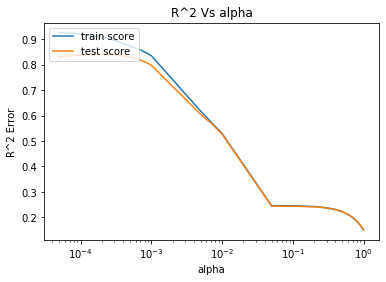

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2 Error')

plt.title("R^2 Vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
lasso.coef_

array([-2.11067698e-02,  7.73435403e-02,  9.16943762e-02,  6.31923718e-02,
        5.53115705e-02,  9.62496263e-02,  9.32421021e-04, -0.00000000e+00,
        1.03127335e-01,  0.00000000e+00,  2.39730334e-02, -0.00000000e+00,
        3.55673097e-01,  4.98443769e-03,  0.00000000e+00,  5.67427812e-03,
        1.00586855e-03, -1.25606819e-02, -2.40626638e-02,  1.43502211e-02,
        4.79444119e-03,  0.00000000e+00,  1.01328576e-02,  1.87995952e-02,
        1.14595079e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.55220201e-02,  4.75824048e-02, -0.00000000e+00, -2.06245971e-03,
       -0.00000000e+00, -5.01682112e-04,  7.48101169e-03,  0.00000000e+00,
        3.47096743e-03, -2.10450245e-03,  1.84923206e-02,  7.25710656e-03,
        3.42232784e-03, -7.52913414e-04,  9.18410437e-03, -0.00000000e+00,
        9.08090138e-03,  0.00000000e+00,  8.86788404e-03, -6.49920654e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_pred = ridge.predict(X_test)
print('Ridge Test R2 Score', r2_score(y_test, y_pred))

Ridge Test R2 Score 0.6539329341878923


In [59]:
y_pred = lasso.predict(X_test)
print('Lasso Test R2 Score', r2_score(y_test, y_pred))

Lasso Test R2 Score 0.7449193870715984


In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(ridge, 10)             
rfe = rfe.fit(X_train, y_train)

col1 = list(X_train.columns[rfe.support_])
col1

['OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'Condition2_PosN',
 'GarageQual_Fa',
 'GarageQual_Po',
 'GarageCond_Po',
 'GarageCond_TA']

In [61]:
rfe = RFE(lasso, 10)             
rfe = rfe.fit(X_train, y_train)

col2 = list(X_train.columns[rfe.support_])
col2

['LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'KitchenAbvGr',
 'GarageArea',
 'Condition2_PosN',
 'RoofMatl_WdShngl']

# Analysis & Model Report

In [62]:
finalcol = [i for i in col1 if i in col2]
finalcol

['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'Condition2_PosN']

In [63]:
col1.append('SalePrice')
col2.append('SalePrice')

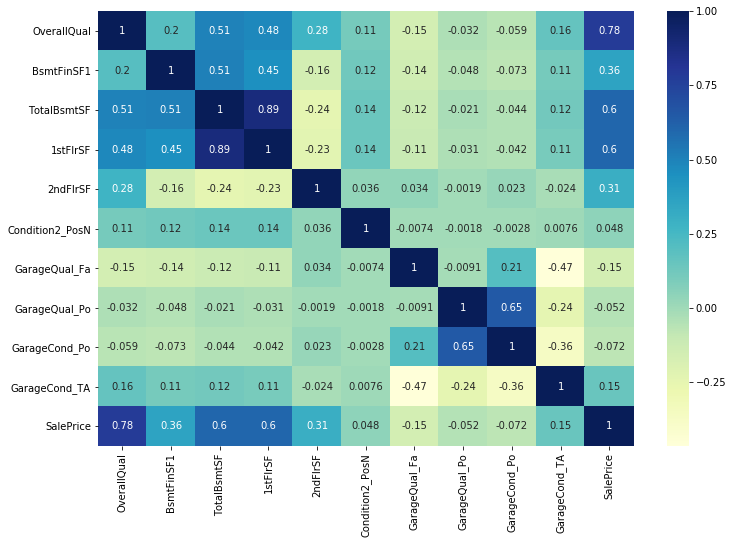

In [64]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[col1].corr(), cmap="YlGnBu", annot = True)
plt.show()

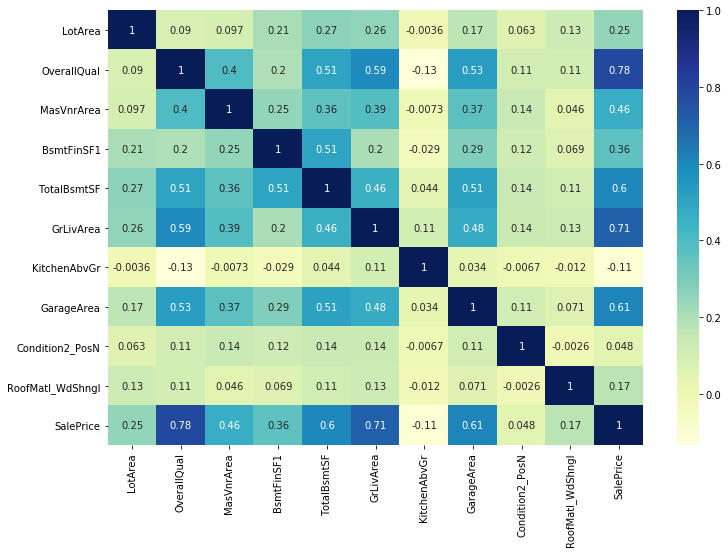

In [65]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[col2].corr(), cmap="YlGnBu", annot = True)
plt.show()

# Top Variables that are significant in predicting the price of a house

1. OverallQual - Rating of overall material and finish of the house
2. BsmtFinSF1 - Type 1 finished square feet
3. TotalBsmtSF - Total square feet of basement area
4. Condition2 - Proximity to various conditions (PosN - Near positive off-site feature--park, greenbelt, etc.)
5. GrLivArea - Above grade (ground) living area square feet
7. GarageArea - Size of garage in square feet
8. 1stFlrSF - First Floor square feet
9. LotArea - Lot size in square feet
10. MasVnrArea - Masonry veneer area in square feet

## Optimal Value of lambda:
1.  Ridge - 0.0001
1.  Lasso - 0.0001

In [66]:
finalcol.append('GrLivArea')
finalcol.append('GarageArea')
finalcol.append('1stFlrSF')
finalcol.append('LotArea')
finalcol.append('MasVnrArea')

In [67]:
finalcol

['OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'Condition2_PosN',
 'GrLivArea',
 'GarageArea',
 '1stFlrSF',
 'LotArea',
 'MasVnrArea']

In [68]:
xtrain_new = X_train[finalcol]
xtest_new  = X_test[finalcol]

In [69]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,  param_grid = params, scoring= 'r2', cv = folds, 
                        return_train_score=True, verbose = 1)            

model_cv.fit(xtrain_new, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0007, 0.0009, 0.001, 0.005, 0.007, 0.01,
                                   0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

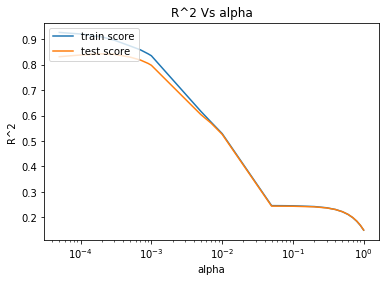

In [70]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')

plt.title("R^2 Vs alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()